#2.1 Data Manipulation

학습 목표 : tensor 그리고 파이토치 익숙하게 하기

In [7]:
import torch #pytorch라는 라이브러리를 사용할건데...

Creating new tensor method : arange

In [16]:
x = torch.arange(12, dtype=torch.float32) #실수형
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [23]:
x[7]

tensor(7.)

total number of elements in tensor method : numel

In [17]:
x.numel()

12

the length along each axis
method : shape

In [18]:
x.shape

torch.Size([12])

chage shape method : reshape

In [19]:
X = x.reshape(3,4) # == x.reshape(-1,4) == x.reshape(3,-1)
X # 3*4 matrix

#dim = 3x4

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [24]:
X[1,2] 

tensor(6.)

텐서를 생성하는 몇가지 메소드들!

In [20]:
torch.zeros((2,3,4)) #dim = 2x3x4 -> [0,1,3]

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [25]:
torch.ones(2,3,4)

#dim = 2x3x4

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

element randomly and independently method : randn

In [28]:
torch.randn(3,4) #들어가는건 dim

tensor([[-0.6003, -0.2000, -1.3472, -0.0433],
        [ 0.4318, -2.0372,  0.3880,  1.1035],
        [-0.6585,  1.2550, -0.3696, -1.9720]])

construct tensors by supplying the exact values

In [31]:
y = torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
#dim = 3x4
y

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [36]:
Y = y.reshape(2,3,2)
Y
#dim = 2x3x2

tensor([[[2, 1],
         [4, 3],
         [1, 2]],

        [[3, 4],
         [4, 3],
         [2, 1]]])

In [37]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [38]:
X[-1]
#index 12개 -> 0~11까지 번호를 붙인다라고 했죠
#앞에서부터 셀 때 0~11까지 세는거잖아, 뒤로도 세보고 싶었던거임
#그래서 도잎한게 -단위 x[11] = x[-1]

tensor([ 8.,  9., 10., 11.])

In [41]:
X[1:3] #1부터 3전까지의 원소들을 뽑겠다! 라는 의미임 1:3이라고 적혀있지만 번호는 1~2까지만 뽑는거야

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [43]:
X[0,3] = 99
X
#dim = 3x4

tensor([[ 0.,  1.,  2., 99.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [46]:
X[:2, :] = 12 #하나만이 아니라 여러개의 원소를 한번에 접근하는 방법
# :2 == 0:2랑 같은 의미
# 0: == 0:3랑 같은 의미
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

Elementwise operation들 중 
mathematical operations

In [47]:
torch.exp(X) #e^x에 x의 원소를 다 넣은거야
#외울필요 x

tensor([[162754.7969, 162754.7969, 162754.7969, 162754.7969],
        [162754.7969, 162754.7969, 162754.7969, 162754.7969],
        [  2980.9580,   8103.0840,  22026.4648,  59874.1406]])

In [48]:
x = torch.tensor([1.0,2,4,8]) #dim = 4
y = torch.tensor([2,2,2,2]) #dim = 4
x+y, x-y, x*y, x**y # x**y = x^y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([ 1.,  4., 16., 64.]))

dim이 같은 한, 쉬운 계산은 다 된다

In [50]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4)) #dim=3x4
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]]) #dim=3x4
#cat 메소드는 텐서를 합치는 메소드
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)
#dim=0은 axis 0을 기준으로, dim=1은 axis 1을 기준으로
#(3+3), (4+4) 꼴이 된거임
#dim=0 -> 6x4, dim=1 -> 3x8

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [52]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [53]:
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [ ]:
X == Y #element check

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [54]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

In [55]:
X > Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [56]:
X.sum() #텐서 안에 있는 모든 원소의 합을 구한다!

tensor(66.)

Broadcasting -> 서로 다른 dim을 연산했을 때 표현되는 방식

In [57]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(3).reshape((1,3))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1, 2]]))

In [58]:
a+b # 3x3의 결과가 나왔다. 

tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]])

Saving Memory

In [ ]:
before = id(Y) # id method는 메모리 주소를 알려주는 연산자 in python
Y = Y+X
id(Y) == before #allocating new memory 사실을 알 수 있음

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:] = X+Y #[:] = <expression>으로 in place update 가능
print('id(Z):',id(Z))

id(Z): 140435000235488
id(Z): 140435000235488


In [ ]:
before = id(X)
X += Y #+= 연산자도 in place update가 가능
id(X) == before

True

Conversino to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)
#item method는 텐서에서 파이썬 스칼라 형식으로 바꿔주구만 in size-1 tensor

(tensor([3.5000]), 3.5, 3.5, 3)

# 2.2 Data Preprocessing

Frist, Reading the dataset

In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv') #우리가 사용할 데이터 파일
with open(data_file, 'w') as f:  #column이 아래
    f.write('''NumRooms,RoofType,Price  
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


Data Preparation

In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na=True) #추정치로 바꾸는 것
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [ ]:
inputs = inputs.fillna(inputs.mean()) #남은 NaN을 mean으로 채우는거야
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


Conversion to the tensor format

In [ ]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(targets.values)
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 2.3 Linear Algebra

In [59]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x*y, x/y, x**y

#원소 하나의 개념

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

Vectors

In [66]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [61]:
x[2]

tensor(2)

In [62]:
len(x) #length

3

In [63]:
x.shape

torch.Size([3])

Matrices

In [64]:
A = torch.arange(6).reshape(3,2) #dim=3x2
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [67]:
A.T #transpose dim=3x2 -> dim=2x3

tensor([[0, 2, 4],
        [1, 3, 5]])

In [68]:
A = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
A == A.T

#대칭 행렬 <- transpose를 해도 구조가 바뀌지 않는 행렬

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Tensors (high-order)

In [70]:
torch.arange(24).reshape(2,3,4)
#dim = 2x3x4 

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

Basic propeties of tensors arithmetic

In [71]:
A = torch.arange(6,dtype=torch.float32).reshape(2,3) #dim = 2x3
B = A.clone() #A의 복사본
A

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [72]:
A+B

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [73]:
A*B #matrix product랑은 다른 개념, Hadamard product라 부른다. elementwise product이다

#matrix product => 2X4 @ 4X2 -> 2X2

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [75]:
a=2
X = torch.arange(24).reshape(2,3,4) #dim = 2x3x4
a + X, (a*X).shape
#원소를 곱해도 dim=2x3x4로 유지되는 것을 보면 dim은 바뀌지 않았구나!

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

In [76]:
a*X

tensor([[[ 0,  2,  4,  6],
         [ 8, 10, 12, 14],
         [16, 18, 20, 22]],

        [[24, 26, 28, 30],
         [32, 34, 36, 38],
         [40, 42, 44, 46]]])

Reduction

In [77]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum() #vecotr sum

(tensor([0., 1., 2.]), tensor(3.))

In [78]:
A

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [79]:
A.shape, A.sum() #dim=2x3

(torch.Size([2, 3]), tensor(15.))

In [80]:
A.shape

torch.Size([2, 3])

In [82]:
A.sum(axis=0) #axis=0이니까 row가 사라지겠금

tensor([3., 5., 7.])

In [81]:
A.sum(axis=0).shape #dim=3, dim이 바뀐 사실이 중요

torch.Size([3])

In [83]:
A.shape, A.sum(axis=1).shape, A.sum(axis=1) #axis=1이니까 column이 사라지겠금

(torch.Size([2, 3]), torch.Size([2]), tensor([ 3., 12.]))

In [84]:
A.sum(axis=[0,1]) == A.sum()

tensor(True)

In [85]:
A.mean(), A.sum()/A.numel() #numel은 개수였지 기억해용
#mean = 평균

(tensor(2.5000), tensor(2.5000))

In [86]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

Non-Reduction Sum

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]), torch.Size([2, 1]))

In [ ]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

Dot product

In [88]:
y = torch.ones(3, dtype = torch.float32)
x,y, torch.dot(x,y) #벡터 내적

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [89]:
torch.sum(x*y) #내적이랑 elementwise multiplication 이랑 같

tensor(3.)

Matrix multiplication  == 행렬 곱셈

In [91]:
A.shape, x.shape, torch.mv(A, x), A@x #mv는 행렬-벡터 곱만 가능, @는 행렬 행렬까지 가능

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [94]:
A #dim = 2x3 , B=3x4 -> A@B =2x4

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [93]:
B=torch.ones(3,4)
torch.mm(A,B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]), tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

Norms

In [95]:
u = torch.tensor([3.0,-4.0])
torch.norm(u) # L2 norm

tensor(5.)

In [96]:
torch.abs(u).sum() #절대값 합 = L1 Norm

tensor(7.)

In [ ]:
torch.norm(torch.ones((4,9)))
#torch.ones((4,9)) -> dim=4x9, ones -> 1로만 채워져 있겠다 

tensor(6.)

# 2.4 Calculus

의미 있는 내용은 딱히 코드적으로 없음

In [97]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

#!pip install matplotlib_inline

ModuleNotFoundError: ignored

In [ ]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [ ]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


# 2.5 Automatic Differentiation

Simple Function

In [103]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

requires_grad=True 는 모든 operation을 추적해야 한다는 의미(기록)

In [104]:
# Can also create x = torch.arange(4.0, requires_grad=True) 같은 의미야
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [105]:
y = 2*torch.dot(x,x) # <x,x>는 1+4+9 =14 #vector 내적
y # 2<x,x> => <x,x> = 2x, 2<x,x> = 4x

tensor(28., grad_fn=<MulBackward0>)

In [106]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4*x # y=2x^Tx 는 4x인걸 알지 in dot product

tensor([True, True, True, True])

In [ ]:
x.grad.zero_() #파이토치는 자동적으로 gradient 버퍼를 리셋해주지 않아 그래서 따로 리셋해줘야함.
y = x.sum() 
y.backward()
x.grad

tensor([1., 1., 1., 1.])

Backward for Non-scalar variables

In [ ]:
x.grad.zero_()
y = x*x
y.backward(gradient=torch.ones(len(y))) #Faster : y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

Detaching Computation

In [ ]:
x.grad.zero_()
y = x*x
u = y.detach() #y의 복사본, z가 x에 주는 direct 영향을 알고 싶어서 y대신 복사본을 넣어 z=x*x*x 꼴을 만드려는 장치
z = u*x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

Gradients and Python Control Flow

In [ ]:
def f(a):
  b = a*2
  while b.norm() < 100:
    b=b*2
  if b.sum()>0:
    c=b
  else:
    c=100*b
  return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [ ]:
a.grad==d/a

tensor(True)

pytorch 공식 사이트 ver

https://tutorials.pytorch.kr/beginner/blitz/autograd_tutorial.html

In [99]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [100]:
Q = 3*a**3 - b**2

In [101]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [102]:
# 수집된 변화도가 올바른지 확인합니다.
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


# 2.6 Probability and Statistics

A simple ex : tossing coins

In [ ]:
!pip install d2l==1.0.0b0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [ ]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)]) #List comprehension 
# in python, random.random 메소드는 [0,1] 인터벌 내에서 숫자 생성기라 보면 댐
tails = num_tosses - heads
print("heads, tails: ", [heads,tails])

heads, tails:  [56, 44]


In [ ]:
fair_probs = torch.tensor([0.5,0.5]) #index 0이 헤드, 1이 테일이라고 생각 
Multinomial(100, fair_probs).sample()

tensor([49., 51.])

In [ ]:
Multinomial(100, fair_probs).sample() / 100 #이건 probability가 아닌 frequency가 맞음

tensor([0.4300, 0.5700])

law of large numbers

In [ ]:
 counts = Multinomial(10000, fair_probs).sample()
 counts / 10000 #횟수를 늘리니 좀 더 이론에 가까워짐

tensor([0.4972, 0.5028])

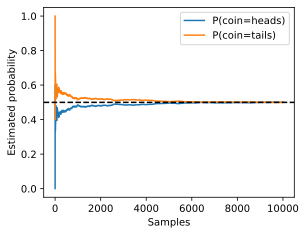

In [ ]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed') #점근선 하나 긋기
d2l.plt.gca().set_xlabel('Samples') 
d2l.plt.gca().set_ylabel('Estimated probability') #x,y축 이름
d2l.plt.legend();